### Smoothing Basic Techniques 
#### 1) Moving Average
#### 2) Simple Exponential Smoothing
#### 3) Halt Method

In [2]:
import pandas as pd
from matplotlib import pyplot
from matplotlib import pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing,Holt
from pylab import rcParams
rcParams['figure.figsize']=20,5

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
electricity_timeseries = pd.read_csv("Electric_Production.csv",header=0,index_col=0)
electricity_timeseries.head()

,Units
DATE,
1/1/1985,72.5052
2/1/1985,70.6720
3/1/1985,62.4502
4/1/1985,57.4714
5/1/1985,55.3151


### Moving average method

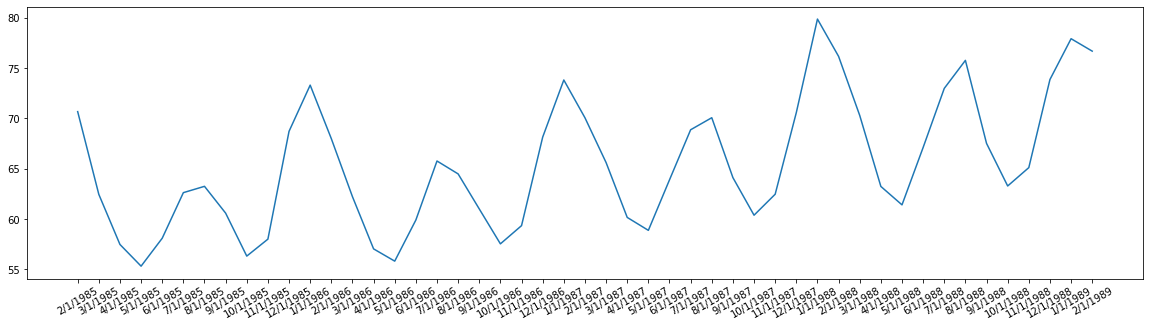

In [5]:
plt.plot(electricity_timeseries[1:50]['Units'])
plt.xticks(rotation=30)
plt.show()

### Note : 
#### It has sesonality and trend (going upwards)

In [6]:
rollingseries = electricity_timeseries[1:50].rolling(window=5)
rollingmean = rollingseries.mean() # MA = 5
rollingmean.head(10)

,Units
DATE,
2/1/1985,NaN
3/1/1985,NaN
4/1/1985,NaN
5/1/1985,NaN
6/1/1985,60.79982
7/1/1985,59.18946
8/1/1985,59.34912
9/1/1985,59.97176
10/1/1985,60.17182


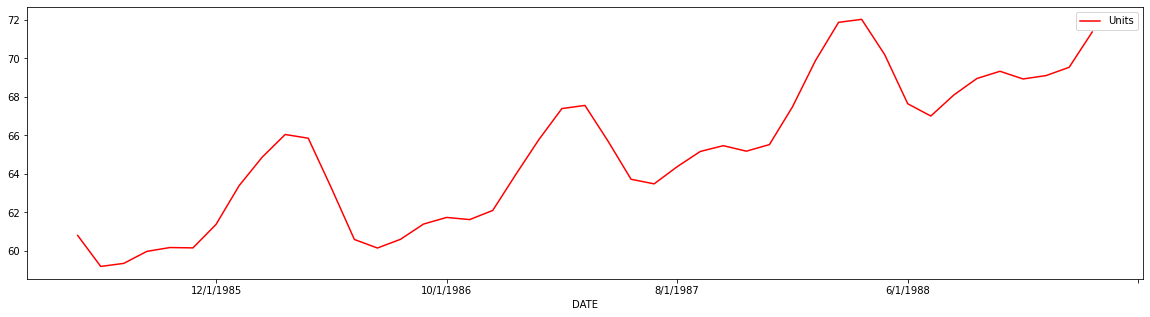

In [7]:
rollingmean.plot(color="red")
pyplot.show()

### Here red has less variance than blue line and it is smoothened

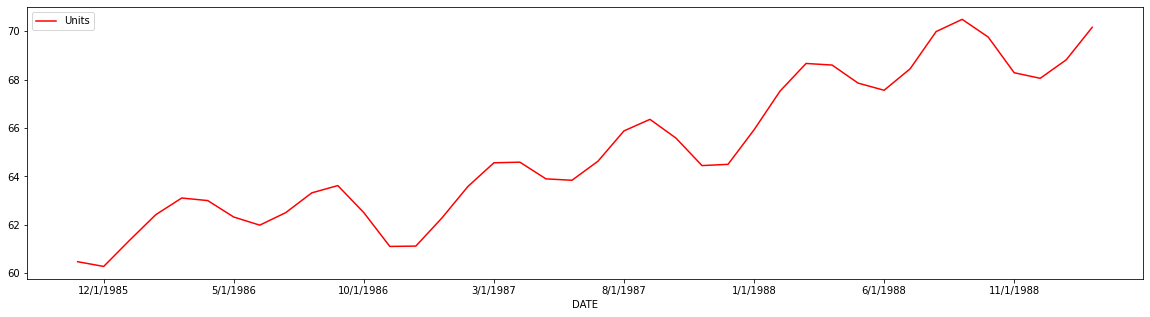

In [8]:
rollingseries = electricity_timeseries[1:50].rolling(window=10)
rollingmean = rollingseries.mean() # MA = 10
rollingmean.plot(color="red")
pyplot.show()

### Here It is smoothned more

## Simple exponential smoothing

In [9]:
data = electricity_timeseries[1:50]
fit1 = SimpleExpSmoothing(data).fit(smoothing_level=0.2,optimized=False)
fit2 = SimpleExpSmoothing(data).fit(smoothing_level=0.8,optimized=False)

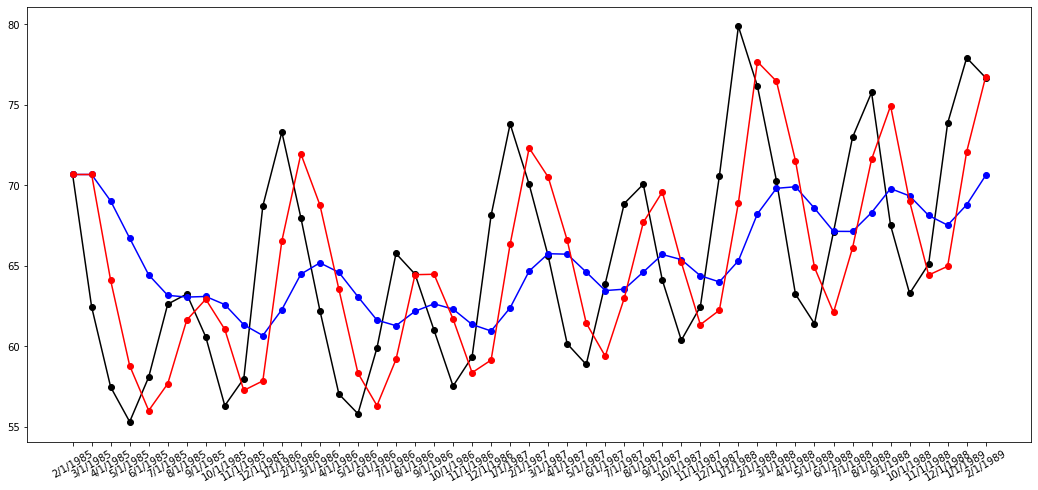

In [10]:
plt.figure(figsize=(18,8))
plt.plot(electricity_timeseries[1:50],marker="o",color="black")
plt.xticks(rotation=30)
plt.plot(fit1.fittedvalues,marker="o",color="blue")
plt.plot(fit2.fittedvalues,marker="o",color="red")

#### Note : 
#### When we giving more value to alpha (recent data points) Then it gives you similar to original time series data
#### When we giving less value to alpha (recent data points) 

### Holt method for exponential smothing

In [11]:
fit1 = Holt(data).fit() # Linear trend 
fit2 = Holt(data,exponential=True).fit() # Exponential trend 

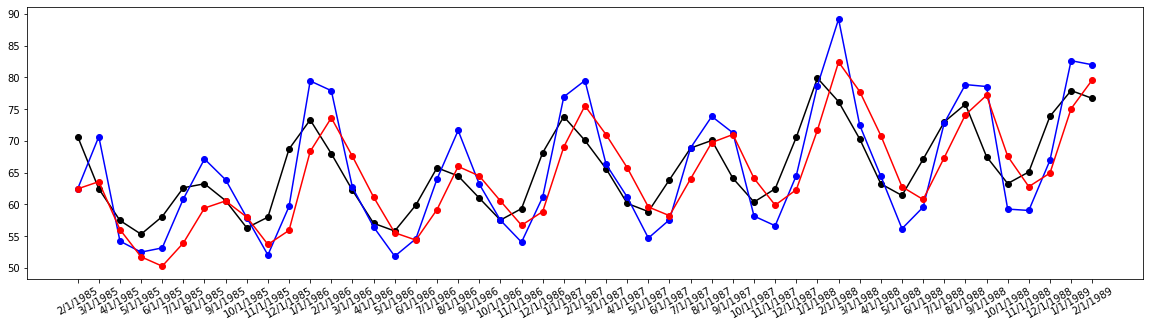

In [12]:
plt.plot(data,marker="o",color="black")
plt.xticks(rotation=30)
plt.plot(fit1.fittedvalues,marker="o",color="blue")
plt.plot(fit2.fittedvalues,marker="o",color="red")